<a href="https://colab.research.google.com/github/AryaKoureshi/Emotion-Detection/blob/main/EmotionDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Emotion Detection
## + Real-time



## Downloading dataset from Kaggle

In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d ananthu017/emotion-detection-fer
! unzip emotion-detection-fer.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
emotion-detection-fer.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  emotion-detection-fer.zip
replace test/angry/im0.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


## Imports

In [2]:
# imports
import cv2
import glob
import skimage.transform as trans
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import save_model, Model, model_from_json, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.applications import VGG16
!pip install visualkeras
import visualkeras

## Initializing parameters

In [4]:
# parameters
numClasses = 6
height = 48
width = 48
batchSize = 64

## Loading data
"disgusted" class excluded

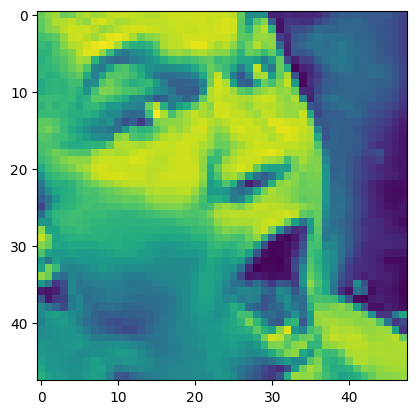

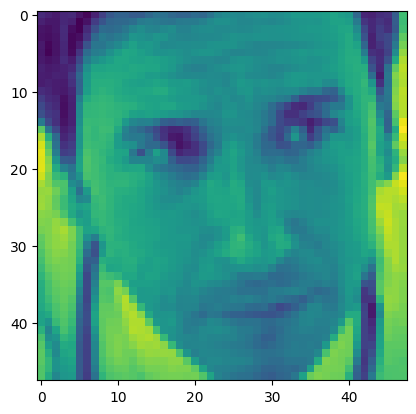

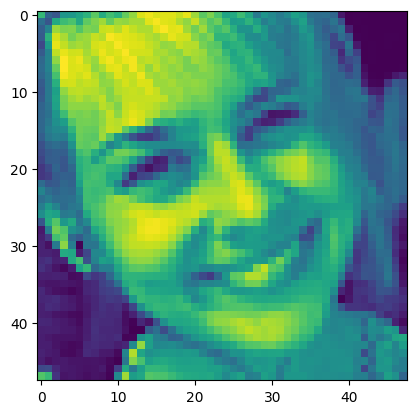

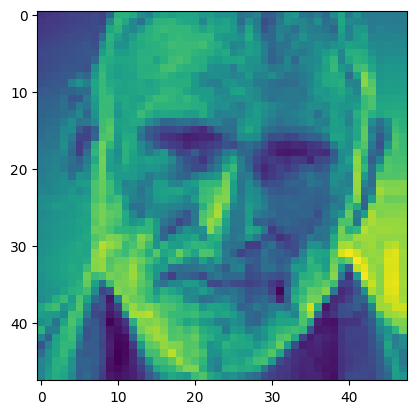

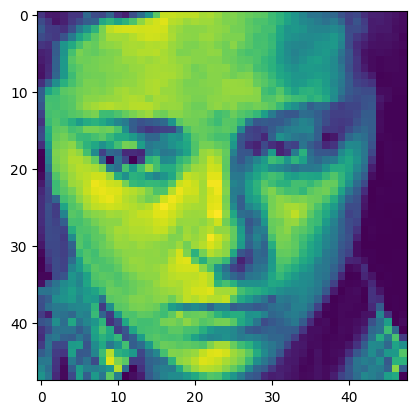

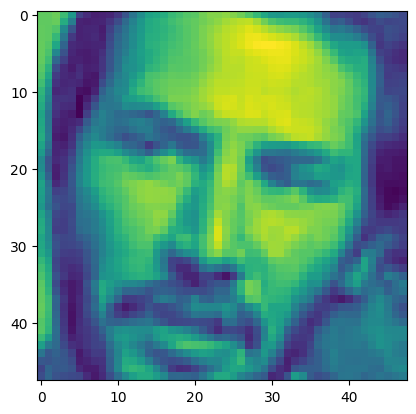

In [4]:
# loading data
x_train = []
y_train = []
x_test = []
y_test = []

cnt = 0
for temp in ["angry", "fearful", "happy", "neutral", "sad", "surprised"]:
    if temp == "angry":
        label = 0
    elif temp == "fearful":
        label = 1
    elif temp == "happy":
        label = 2
    elif temp == "neutral":
        label = 3
    elif temp == "sad":
        label = 4
    elif temp == "surprised":
        label = 5
    #elif temp == "disgusted":
        #label = 6

    path = "/content/train/{}/".format(temp)
    images = glob.glob(path + "*.png")
    images.sort()
    for x in images:
       image = cv2.imread(x, cv2.IMREAD_GRAYSCALE)
       image = image / 255
       image = trans.resize(image,(height,width))
       y_train.append(label)
       x_train.append(image)

    path = "/content/test/{}/".format(temp)
    images = glob.glob(path + "*.png")
    images.sort()
    for x in images:
       image = cv2.imread(x, cv2.IMREAD_GRAYSCALE)
       image = image / 255
       image = trans.resize(image,(height,width))
       y_test.append(label)
       x_test.append(image)
    if cnt <= numClasses:
      plt.figure()
      plt.imshow(image)
    cnt += 1

## Preparing data

In [5]:
# preparing data
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = np.reshape(x_train, (len(x_train), height, width, 1))
x_test = np.reshape(x_test, (len(x_test), height, width, 1))
y_train= to_categorical(y_train, num_classes=numClasses)
y_test = to_categorical(y_test, num_classes=numClasses)

## Model 1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

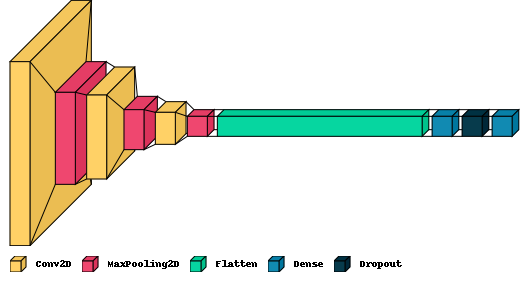

In [ ]:
def model1(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    print(model.summary())
    return model

model = model1((height,weight,1), numClasses)
visualkeras.layered_view(model,legend=True, draw_volume=True)

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=40,
                    verbose=1,
                    batch_size=batchSize,
                    validation_data=(x_test, y_test))

Epoch 1/40
442/442 [==============================] - 19s 17ms/step - loss: 1.6557 - accuracy: 0.3184 - val_loss: 1.4808 - val_accuracy: 0.4174
Epoch 2/40
442/442 [==============================] - 5s 10ms/step - loss: 1.4430 - accuracy: 0.4258 - val_loss: 1.3336 - val_accuracy: 0.4793
Epoch 3/40
442/442 [==============================] - 4s 8ms/step - loss: 1.3243 - accuracy: 0.4828 - val_loss: 1.2604 - val_accuracy: 0.4978
Epoch 4/40
442/442 [==============================] - 4s 9ms/step - loss: 1.2519 - accuracy: 0.5114 - val_loss: 1.2302 - val_accuracy: 0.5149
Epoch 5/40
442/442 [==============================] - 3s 8ms/step - loss: 1.2060 - accuracy: 0.5319 - val_loss: 1.1787 - val_accuracy: 0.5420
Epoch 6/40
442/442 [==============================] - 3s 7ms/step - loss: 1.1624 - accuracy: 0.5505 - val_loss: 1.1637 - val_accuracy: 0.5455
Epoch 7/40
442/442 [==============================] - 3s 8ms/step - loss: 1.1189 - accuracy: 0.5689 - val_loss: 1.1345 - val_accuracy: 0.5584
Epo

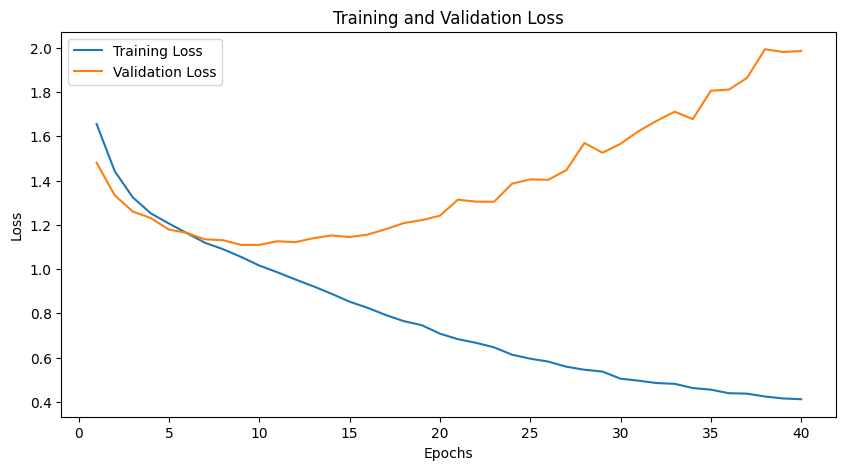

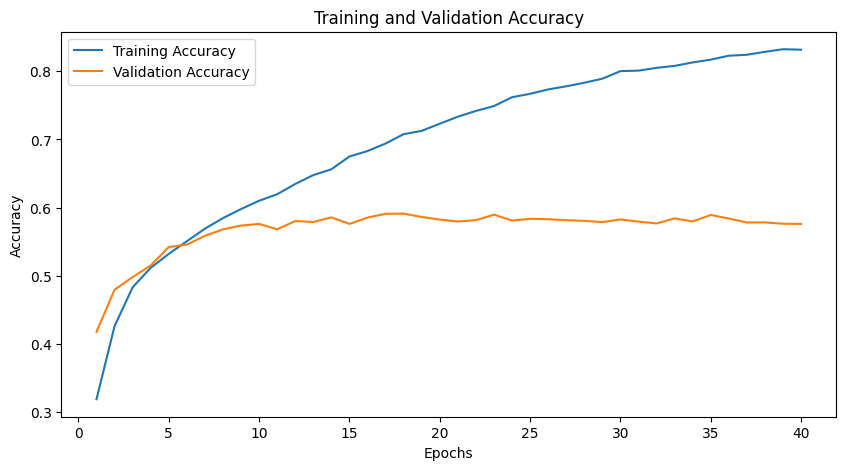

In [ ]:
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
model_json = model.to_json()
with open("model_arch1.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model1.h5")
print("Saved model to disk")

# Evaluate the model on test set
score = model.evaluate(x_test,
                       y_test,
                       verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])

Saved model to disk

 Test accuracy: 0.1158907562494278


## Model 2

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 48, 48, 1)]       0         
                                                                 
 conv1_1 (Conv2D)            (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 conv1_2 (Conv2D)            (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 pool1_1 (MaxPooling2D)      (None, 24, 24, 64)        0     

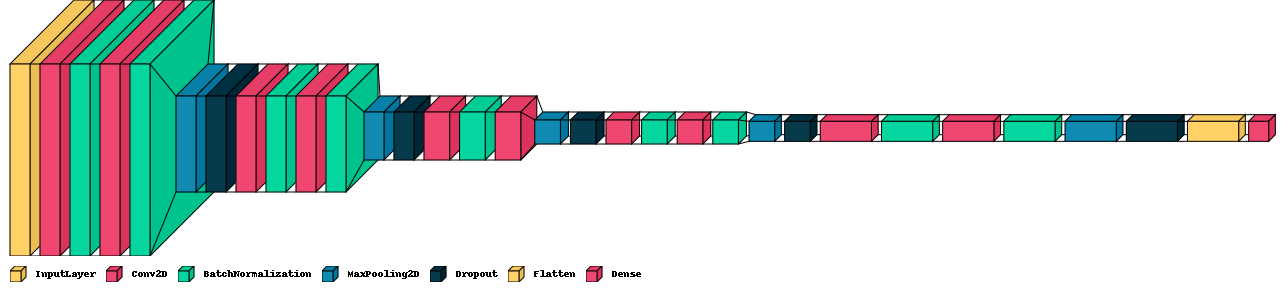

In [ ]:
def FER_Model(input_shape=(height,width,1)):
    # first input model
    visible = Input(shape=input_shape, name='input')
    #the 1-st block
    conv1_1 = Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_1')(visible)
    conv1_1 = BatchNormalization()(conv1_1)
    conv1_2 = Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_2')(conv1_1)
    conv1_2 = BatchNormalization()(conv1_2)
    pool1_1 = MaxPooling2D(pool_size=(2,2), name = 'pool1_1')(conv1_2)
    drop1_1 = Dropout(0.3, name = 'drop1_1')(pool1_1)#the 2-nd block
    conv2_1 = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_1')(drop1_1)
    conv2_1 = BatchNormalization()(conv2_1)
    conv2_2 = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_2')(conv2_1)
    conv2_2 = BatchNormalization()(conv2_2)
    pool2_1 = MaxPooling2D(pool_size=(2,2), name = 'pool2_1')(conv2_2)
    drop2_1 = Dropout(0.3, name = 'drop2_1')(pool2_1)#the 3-rd block
    conv3_1 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_1')(drop2_1)
    conv3_1 = BatchNormalization()(conv3_1)
    conv3_2 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_2')(conv3_1)
    pool3_1 = MaxPooling2D(pool_size=(2,2), name = 'pool3_1')(conv3_2)
    drop3_1 = Dropout(0.3, name = 'drop3_1')(pool3_1)#the 4-th block
    conv4_1 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_1')(drop3_1)
    conv4_1 = BatchNormalization()(conv4_1)
    conv4_2 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_2')(conv4_1)
    conv4_2 = BatchNormalization()(conv4_2)
    pool4_1 = MaxPooling2D(pool_size=(2,2), name = 'pool4_1')(conv4_2)
    drop4_1 = Dropout(0.3, name = 'drop4_1')(pool4_1)

    #the 5-th block
    conv5_1 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_1')(drop4_1)
    conv5_1 = BatchNormalization()(conv5_1)
    conv5_2 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_2')(conv5_1)
    conv5_2 = BatchNormalization()(conv5_2)
    pool5_1 = MaxPooling2D(pool_size=(2,2), name = 'pool5_1')(conv5_2)
    drop5_1 = Dropout(0.3, name = 'drop5_1')(pool5_1)#Flatten and output
    flatten = Flatten(name = 'flatten')(drop5_1)
    ouput = Dense(numClasses, activation='softmax', name = 'output')(flatten)# create model
    model = Model(inputs =visible, outputs = ouput)
    # summary layers
    print(model.summary())

    return model
model = FER_Model()
opt = Adam()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
visualkeras.layered_view(model,legend=True, draw_volume=True)

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=40,
                    verbose=1,
                    batch_size=batchSize,
                    validation_data=(x_test, y_test))

Epoch 1/40
442/442 [==============================] - 37s 63ms/step - loss: 2.0921 - accuracy: 0.2843 - val_loss: 2.2314 - val_accuracy: 0.3004
Epoch 2/40
442/442 [==============================] - 27s 61ms/step - loss: 1.4959 - accuracy: 0.4407 - val_loss: 1.4612 - val_accuracy: 0.4539
Epoch 3/40
442/442 [==============================] - 27s 61ms/step - loss: 1.2411 - accuracy: 0.5169 - val_loss: 1.2288 - val_accuracy: 0.5342
Epoch 4/40
442/442 [==============================] - 25s 58ms/step - loss: 1.1302 - accuracy: 0.5631 - val_loss: 1.1922 - val_accuracy: 0.5472
Epoch 5/40
442/442 [==============================] - 25s 57ms/step - loss: 1.0573 - accuracy: 0.5931 - val_loss: 1.1254 - val_accuracy: 0.5619
Epoch 6/40
442/442 [==============================] - 25s 57ms/step - loss: 1.0114 - accuracy: 0.6126 - val_loss: 1.1246 - val_accuracy: 0.5813
Epoch 7/40
442/442 [==============================] - 26s 60ms/step - loss: 0.9596 - accuracy: 0.6328 - val_loss: 1.1283 - val_accuracy:

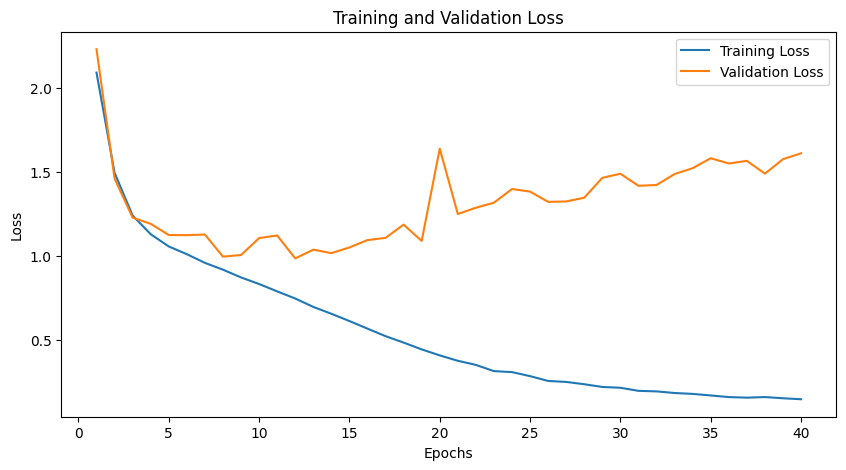

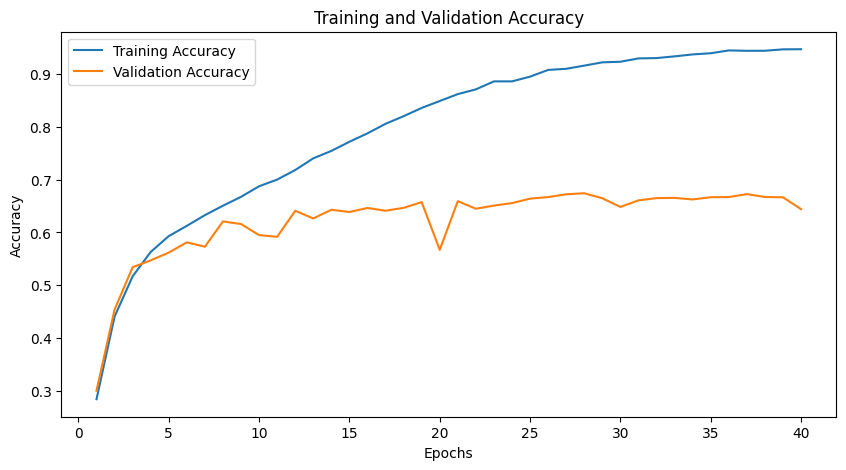

In [ ]:
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
model_json = model.to_json()
with open("model_arch2.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model2.h5")
print("Saved model to disk")

# Evaluate the model on test set
score = model.evaluate(x_test,
                       y_test,
                       verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])

Saved model to disk

 Test accuracy: 0.6441205739974976


## Model 3

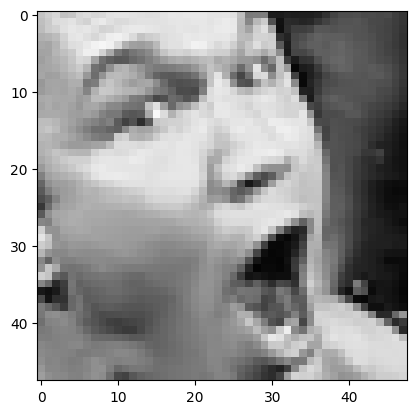

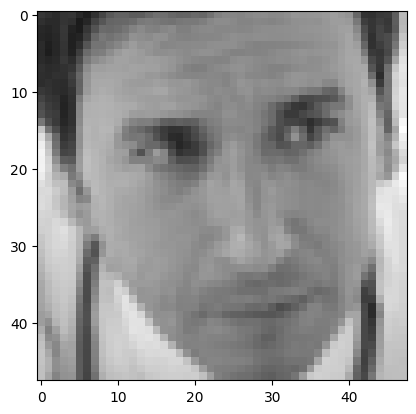

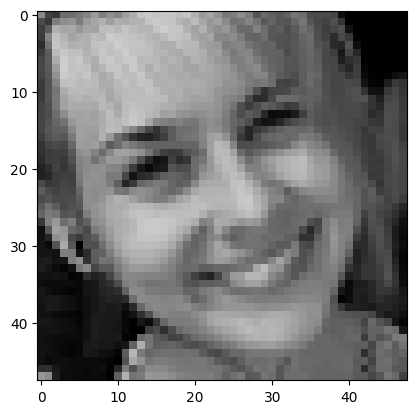

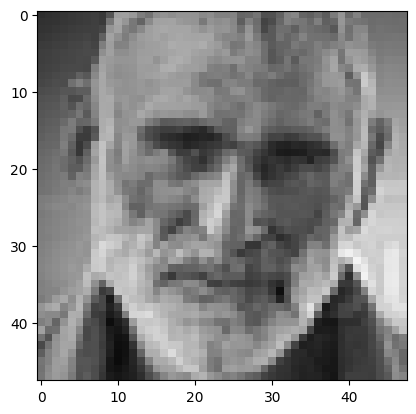

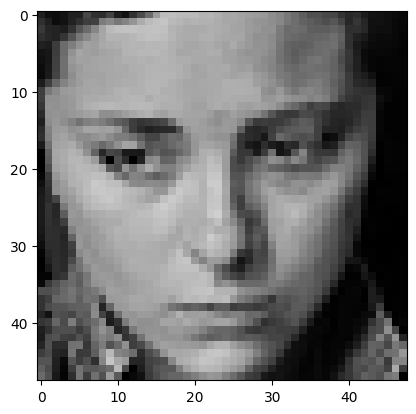

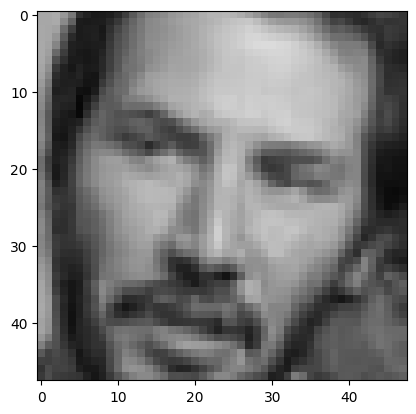

In [ ]:
# loading data
x_train = []
y_train = []
x_test = []
y_test = []

cnt = 0
for temp in ["angry", "fearful", "happy", "neutral", "sad", "surprised"]:
    if temp == "angry":
        label = 0
    elif temp == "fearful":
        label = 1
    elif temp == "happy":
        label = 2
    elif temp == "neutral":
        label = 3
    elif temp == "sad":
        label = 4
    elif temp == "surprised":
        label = 5
    #elif temp == "disgusted":
        #label = 6

    path = "/content/train/{}/".format(temp)
    images = glob.glob(path + "*.png")
    images.sort()
    for x in images:
       image = cv2.imread(x)
       image = image / 255
       image = trans.resize(image,(height,width))
       y_train.append(label)
       x_train.append(image)

    path = "/content/test/{}/".format(temp)
    images = glob.glob(path + "*.png")
    images.sort()
    for x in images:
       image = cv2.imread(x)
       image = image / 255
       image = trans.resize(image,(height,width))
       y_test.append(label)
       x_test.append(image)
    if cnt <= numClasses:
      plt.figure()
      plt.imshow(image)
    cnt += 1

# preparing data
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = np.reshape(x_train, (len(x_train), height, width, 3))
x_test = np.reshape(x_test, (len(x_test), height, width, 3))
y_train= to_categorical(y_train, num_classes=numClasses)
y_test = to_categorical(y_test, num_classes=numClasses)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

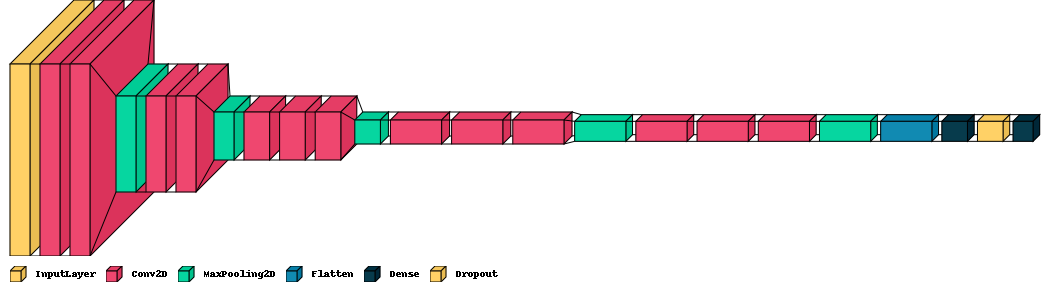

In [ ]:
def model3(input_shape, num_classes):
  model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
  # Freeze the pre-trained layers to avoid overfitting
  for layer in model.layers:
      layer.trainable = False

  # Add custom classification head on top of VGG
  x = Flatten()(model.output)
  x = Dense(256, activation='relu')(x)
  x = Dropout(0.5)(x)
  predictions = Dense(num_classes, activation='softmax')(x)

  new_model = Model(inputs=model.input, outputs=predictions)
  new_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

  return new_model

model = model3((height,width,3), numClasses)
print(model.summary())
visualkeras.layered_view(model,legend=True, draw_volume=True)

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=40,
                    verbose=1,
                    batch_size=batchSize,
                    validation_data=(x_test, y_test))

Epoch 1/40
442/442 [==============================] - 13s 26ms/step - loss: 1.6273 - accuracy: 0.3394 - val_loss: 1.5375 - val_accuracy: 0.3740
Epoch 2/40
442/442 [==============================] - 11s 25ms/step - loss: 1.5381 - accuracy: 0.3866 - val_loss: 1.5002 - val_accuracy: 0.4125
Epoch 3/40
442/442 [==============================] - 11s 25ms/step - loss: 1.5064 - accuracy: 0.4017 - val_loss: 1.4748 - val_accuracy: 0.4160
Epoch 4/40
442/442 [==============================] - 10s 23ms/step - loss: 1.4881 - accuracy: 0.4122 - val_loss: 1.4617 - val_accuracy: 0.4211
Epoch 5/40
442/442 [==============================] - 11s 24ms/step - loss: 1.4711 - accuracy: 0.4188 - val_loss: 1.4528 - val_accuracy: 0.4272
Epoch 6/40
442/442 [==============================] - 11s 25ms/step - loss: 1.4577 - accuracy: 0.4275 - val_loss: 1.4430 - val_accuracy: 0.4305
Epoch 7/40
442/442 [==============================] - 10s 23ms/step - loss: 1.4375 - accuracy: 0.4351 - val_loss: 1.4390 - val_accuracy:

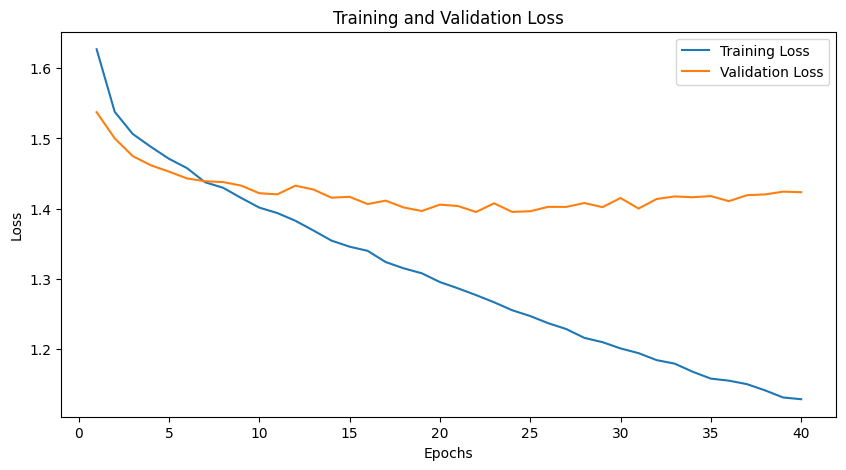

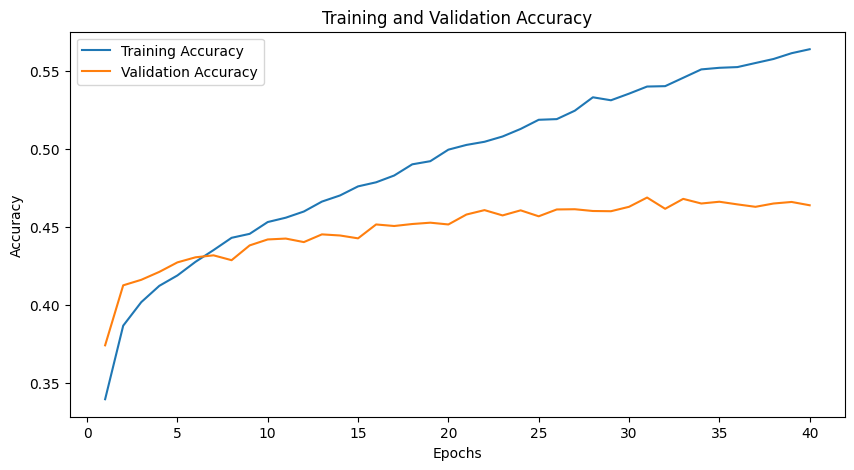

In [ ]:
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [ ]:
model_json = model.to_json()
with open("model_arch3.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model3.h5")
print("Saved model to disk")

# Evaluate the model on test set
score = model.evaluate(x_test,
                       y_test,
                       verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])

Saved model to disk

 Test accuracy: 0.4638460576534271


## Using Data Generator

### Initializing parameters

In [3]:
# parameters
numClasses = 7
height = 48
width = 48
batchSize = 64

### Loading data


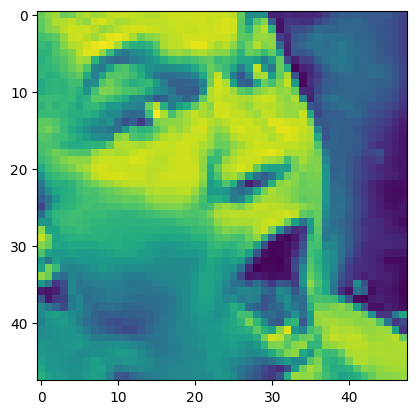

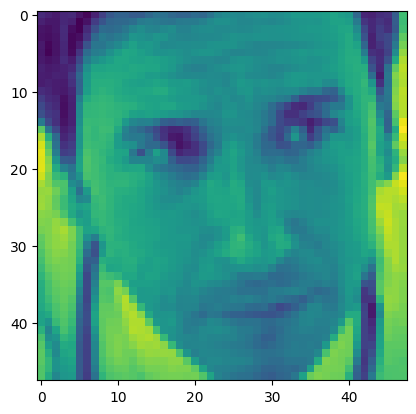

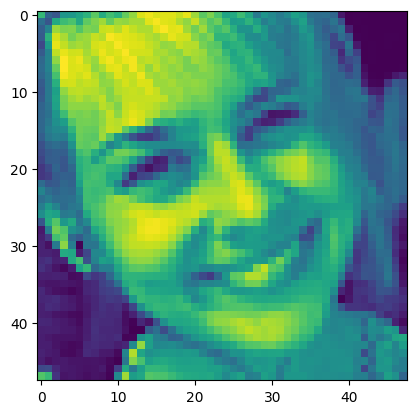

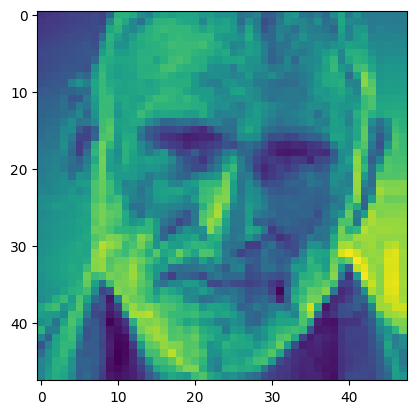

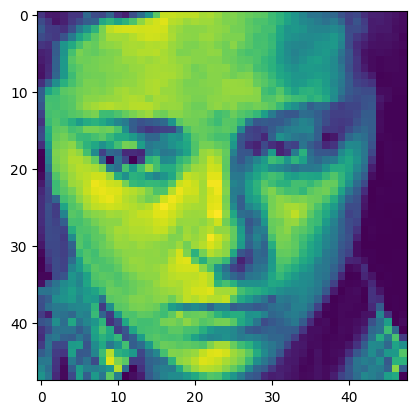

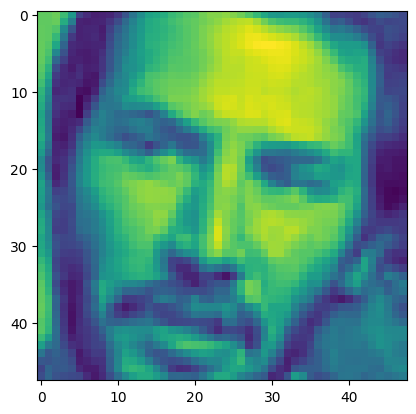

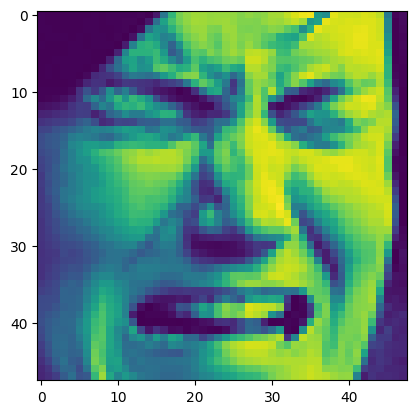

In [4]:
# loading data
x_train = []
y_train = []
x_test = []
y_test = []

cnt = 0
for temp in ["angry", "fearful", "happy", "neutral", "sad", "surprised", "disgusted"]:
    if temp == "angry":
        label = 0
    elif temp == "fearful":
        label = 1
    elif temp == "happy":
        label = 2
    elif temp == "neutral":
        label = 3
    elif temp == "sad":
        label = 4
    elif temp == "surprised":
        label = 5
    elif temp == "disgusted":
        label = 6

    path = "/content/train/{}/".format(temp)
    images = glob.glob(path + "*.png")
    images.sort()
    for x in images:
       image = cv2.imread(x, cv2.IMREAD_GRAYSCALE)
       image = image / 255
       image = trans.resize(image,(height,width))
       y_train.append(label)
       x_train.append(image)

    path = "/content/test/{}/".format(temp)
    images = glob.glob(path + "*.png")
    images.sort()
    for x in images:
       image = cv2.imread(x, cv2.IMREAD_GRAYSCALE)
       image = image / 255
       image = trans.resize(image,(height,width))
       y_test.append(label)
       x_test.append(image)
    if cnt <= numClasses:
      plt.figure()
      plt.imshow(image)
    cnt += 1

### Preparing data

In [5]:
# preparing data
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = np.reshape(x_train, (len(x_train), height, width, 1))
x_test = np.reshape(x_test, (len(x_test), height, width, 1))
y_train= to_categorical(y_train, num_classes=numClasses)
y_test = to_categorical(y_test, num_classes=numClasses)

### Data Generator

In [6]:
datagen = ImageDataGenerator(
    rotation_range = 10,
    horizontal_flip = True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode = 'nearest')

testgen = ImageDataGenerator()

In [7]:
datagen.fit(x_train)

In [8]:
train_flow = datagen.flow(x_train, y_train, batch_size=batchSize)
test_flow = testgen.flow(x_test, y_test, batch_size=batchSize)

## Model 1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

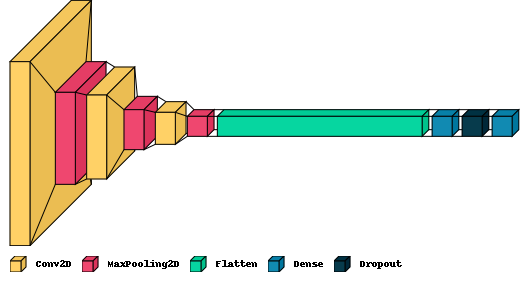

In [9]:
def model1(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    print(model.summary())
    return model

model = model1((height,width,1), numClasses)
visualkeras.layered_view(model,legend=True, draw_volume=True)

In [10]:
history = model.fit_generator(train_flow,
                              steps_per_epoch=len(x_train)/batchSize,
                              epochs=100,
                              verbose=1,
                              validation_data=test_flow)

<ipython-input-10-0da63cd07453>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_flow,


Epoch 1/100
448/448 [==============================] - 28s 31ms/step - loss: 1.7966 - accuracy: 0.2542 - val_loss: 1.6887 - val_accuracy: 0.3084
Epoch 2/100
448/448 [==============================] - 14s 30ms/step - loss: 1.6908 - accuracy: 0.3230 - val_loss: 1.4971 - val_accuracy: 0.4248
Epoch 3/100
448/448 [==============================] - 14s 31ms/step - loss: 1.5570 - accuracy: 0.3937 - val_loss: 1.3923 - val_accuracy: 0.4659
Epoch 4/100
448/448 [==============================] - 13s 30ms/step - loss: 1.4722 - accuracy: 0.4353 - val_loss: 1.3265 - val_accuracy: 0.4965
Epoch 5/100
448/448 [==============================] - 13s 30ms/step - loss: 1.4154 - accuracy: 0.4582 - val_loss: 1.2838 - val_accuracy: 0.5032
Epoch 6/100
448/448 [==============================] - 13s 30ms/step - loss: 1.3823 - accuracy: 0.4700 - val_loss: 1.2736 - val_accuracy: 0.5169
Epoch 7/100
448/448 [==============================] - 14s 30ms/step - loss: 1.3575 - accuracy: 0.4859 - val_loss: 1.2411 - val_ac

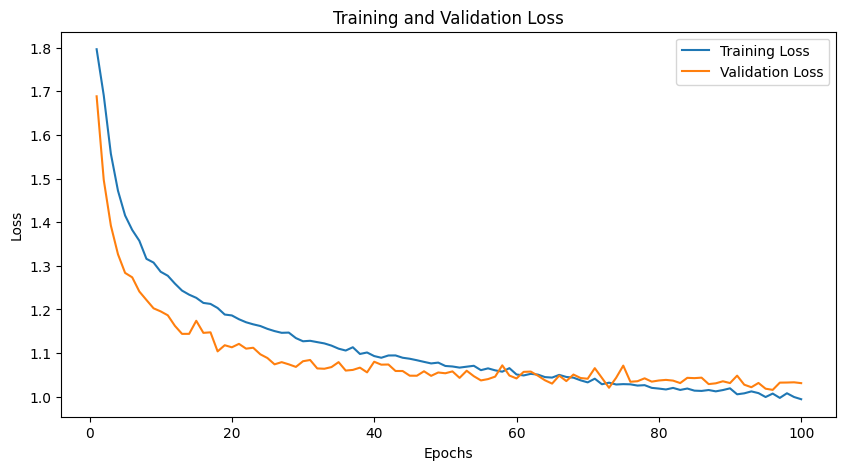

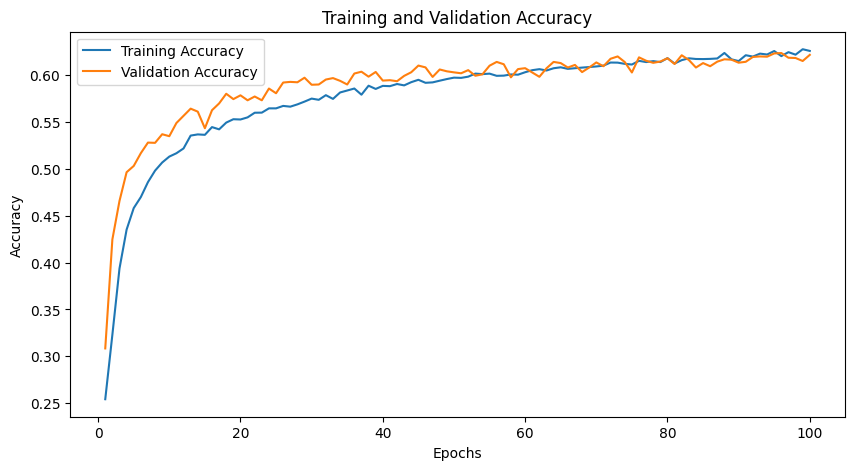

In [11]:
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [12]:
model_json = model.to_json()
with open("model_arch1.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model1.h5")
print("Saved model to disk")

# Evaluate the model on test set
score = model.evaluate(x_test,
                       y_test,
                       verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])

Saved model to disk

 Test accuracy: 0.6217609643936157


## Real time with webcam

In [3]:
model = model_from_json(open("model_arch1.json", "r").read())
model.load_weights('model1.h5')

In [4]:
face_haar_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

In [14]:
from google.colab.patches import cv2_imshow
cap=cv2.VideoCapture(0)

while True:
    res,frame=cap.read()
    cv2.imshow('frame', frame)
    height, width , channel = frame.shape
    sub_img = frame[0:int(height/6),0:int(width)]

    black_rect = np.ones(sub_img.shape, dtype=np.uint8)*0
    res = cv2.addWeighted(sub_img, 0.77, black_rect,0.23, 0)
    FONT = cv2.FONT_HERSHEY_SIMPLEX
    FONT_SCALE = 0.8
    FONT_THICKNESS = 2
    lable_color = (10, 10, 255)
    lable = "Emotion Detection"
    lable_dimension = cv2.getTextSize(lable,FONT ,FONT_SCALE,FONT_THICKNESS)[0]
    textX = int((res.shape[1] - lable_dimension[0]) / 2)
    textY = int((res.shape[0] + lable_dimension[1]) / 2)
    cv2.putText(res, lable, (textX,textY), FONT, FONT_SCALE, (0,0,0), FONT_THICKNESS)
    gray_image= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_haar_cascade.detectMultiScale(gray_image)
    try:
        for (x,y, w, h) in faces:
            cv2.rectangle(frame, pt1 = (x,y),pt2 = (x+w, y+h), color = (255,0,0),thickness =  2)
            roi_gray = gray_image[y-5:y+h+5,x-5:x+w+5]
            roi_gray=cv2.resize(roi_gray,(48,48))
            image_pixels = img_to_array(roi_gray)
            image_pixels = np.expand_dims(image_pixels, axis = 0)
            image_pixels /= 255
            predictions = model.predict(image_pixels)
            max_index = np.argmax(predictions[0])
            emotion_detection = ('angry', 'fear', 'happy', 'sad', 'surprise', 'neutral')
            emotion_prediction = emotion_detection[max_index]
            cv2.putText(res, "Sentiment: {}".format(emotion_prediction), (0,textY+22+5), FONT,0.7, lable_color,2)
            lable_violation = 'Confidence: {}'.format(str(np.round(np.max(predictions[0])*100,1))+ "%")
            violation_text_dimension = cv2.getTextSize(lable_violation,FONT,FONT_SCALE,FONT_THICKNESS )[0]
            violation_x_axis = int(res.shape[1]- violation_text_dimension[0])
            cv2.putText(res, lable_violation, (violation_x_axis,textY+22+5), FONT,0.7, lable_color,2)
    except :
        pass
    frame[0:int(height/6),0:int(width)] =res
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows

AttributeError: ignored

In [15]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [26]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
img = ''
count = 0
while True:
  js_reply = video_frame(label_html, img)
  if not js_reply:
      break
  img_array = np.zeros([480,640,4], dtype=np.uint8)

  # convert JS response to OpenCV Image
  img = js_to_image(js_reply["img"])
  height, width , channel = img.shape
  sub_img = img[0:int(height/6),0:int(width)]
  black_rect = np.ones(sub_img.shape, dtype=np.uint8)*0
  res = cv2.addWeighted(sub_img, 0.77, black_rect,0.23, 0)
  FONT = cv2.FONT_HERSHEY_SIMPLEX
  FONT_SCALE = 0.8
  FONT_THICKNESS = 2
  lable_color = (10, 10, 255)
  lable = "Emotion Detection"
  lable_dimension = cv2.getTextSize(lable,FONT ,FONT_SCALE,FONT_THICKNESS)[0]
  textX = int((res.shape[1] - lable_dimension[0]) / 2)
  textY = int((res.shape[0] + lable_dimension[1]) / 2)
  cv2.putText(res, lable, (textX,textY), FONT, FONT_SCALE, (0,0,0), FONT_THICKNESS)
  gray_image= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_haar_cascade.detectMultiScale(gray_image)
  try:
      for (x,y, w, h) in faces:
          cv2.rectangle(img, pt1 = (x,y),pt2 = (x+w, y+h), color = (255,0,0),thickness =  2)
          roi_gray = gray_image[y-5:y+h+5,x-5:x+w+5]
          roi_gray=cv2.resize(roi_gray,(48,48))
          image_pixels = img_to_array(roi_gray)
          image_pixels = np.expand_dims(image_pixels, axis = 0)
          image_pixels /= 255
          predictions = model.predict(image_pixels)
          max_index = np.argmax(predictions[0])
          emotion_detection = ('angry', 'fear', 'happy', 'sad', 'surprise', 'neutral')
          emotion_prediction = emotion_detection[max_index]
          cv2.putText(res, "Sentiment: {}".format(emotion_prediction), (0,textY+22+5), FONT,0.7, lable_color,2)
          lable_violation = 'Confidence: {}'.format(str(np.round(np.max(predictions[0])*100,1))+ "%")
          violation_text_dimension = cv2.getTextSize(lable_violation,FONT,FONT_SCALE,FONT_THICKNESS )[0]
          violation_x_axis = int(res.shape[1]- violation_text_dimension[0])
          cv2.putText(res, lable_violation, (violation_x_axis,textY+22+5), FONT,0.7, lable_color,2)
  except :
      pass
  img[0:int(height/6),0:int(width)] =res
  img_array[:,:,3] = (img_array.max(axis = 2) > 0 ).astype(int) * 255
  # convert overlay of bbox into bytes
  img_bytes = bbox_to_bytes(img_array)
  # update bbox so next frame gets new overlay
  img = img_bytes


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 21ms/step


KeyboardInterrupt: ignored